### 볼린저 밴드 투자 전략
1. 이동 평균선 : 데이터의 20개의 평균값
2. 상단 밴드 : 이동 평균선 + (2 * 20개의 데이터의 표준편차)
3. 하단 밴드 : 이동 평균선 - (2 * 20개의 데이터의 표준편차)
4. 매수 타이밍 : 하단밴드보다 이하로 가격이 떨어졌을때
5. 매도 타이밍 : 상단 밴드보다 이상으로 가격이 올랐을때

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [12]:
df = pd.read_csv("../../csv/MSFT.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.069996,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.072496,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.073746,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.071871,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.070621,47894400


In [13]:
# 데이터프레임의 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8389 entries, 0 to 8388
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8389 non-null   object 
 1   Open       8389 non-null   float64
 2   High       8389 non-null   float64
 3   Low        8389 non-null   float64
 4   Close      8389 non-null   float64
 5   Adj Close  8389 non-null   float64
 6   Volume     8389 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 458.9+ KB


In [14]:
# Date 컬럼의 데이터를 시계열로 변경하고 인덱스 설정
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [15]:
# 결측치, 양의 무한대, 음의 무한대를 제외
flag = df.isin( [np.nan, np.inf, -np.inf] ).any(axis=1)
df = df.loc[~flag, ['Adj Close']]

In [16]:
df

,Adj Close
Date,
1986-03-13,0.069996
1986-03-14,0.072496
1986-03-17,0.073746
1986-03-18,0.071871
1986-03-19,0.070621
...,...
2019-06-18,135.160004
2019-06-19,135.690002
2019-06-20,136.949997


In [17]:
df.head()

,Adj Close
Date,
1986-03-13,0.069996
1986-03-14,0.072496
1986-03-17,0.073746
1986-03-18,0.071871
1986-03-19,0.070621


In [20]:
# 이동 평균선 생성
# 20개의 데이터의 평균 값
df.iloc[0:20].mean()

Adj Close    0.069246
dtype: float64

In [21]:
df2 = df.copy()

In [27]:
# 반복문을 이용하여 이동평균선 생성
df2['center'] = np.nan
df2

,Adj Close,center
Date,,
1986-03-13,0.069996,NaN
1986-03-14,0.072496,NaN
1986-03-17,0.073746,NaN
1986-03-18,0.071871,NaN
1986-03-19,0.070621,NaN
...,...,...
2019-06-18,135.160004,NaN
2019-06-19,135.690002,NaN
2019-06-20,136.949997,NaN


In [28]:
for i in range(20, len(df2)+1):
    mean_data = df2.iloc[i-20 : i, 0].mean()
    # 평균값을 i번째 인덱스의 2번째 컬럼(1)에 대입
    df2.iloc[i-1, 1] = mean_data
df2

,Adj Close,center
Date,,
1986-03-13,0.069996,NaN
1986-03-14,0.072496,NaN
1986-03-17,0.073746,NaN
1986-03-18,0.071871,NaN
1986-03-19,0.070621,NaN
...,...,...
2019-06-18,135.160004,128.226002
2019-06-19,135.690002,128.665502
2019-06-20,136.949997,129.129502


In [34]:
# rolling(n) : n만큼 데이터를 그룹화
df['center'] = df['Adj Close'].rolling(20).mean()

In [36]:
df.iloc[18:22]

,Adj Close,center
Date,,
1986-04-09,0.069996,NaN
1986-04-10,0.070621,0.069246
1986-04-11,0.071871,0.069340
1986-04-14,0.072496,0.069340


In [ ]:
# 상단 밴드 생성
df['up'] = df['center'] + (2 * df['Adj Close'].rolling(20).std())

In [41]:
# 하단 밴드 생성
df['down'] = df['center'] - (2 * df['Adj Close'].rolling(20).std())

In [67]:
df_test = df.tail(100)

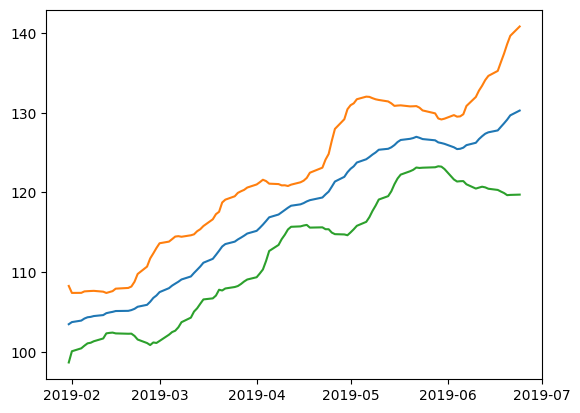

In [68]:
x = df_test.index
center_price = df_test['center']
up_price = df_test['up']
down_price = df_test['down']

plt.Figure(figsize = (16, 8))
plt.plot(x, center_price)
plt.plot(x, up_price)
plt.plot(x, down_price)

plt.show()

<Axes: xlabel='Date'>

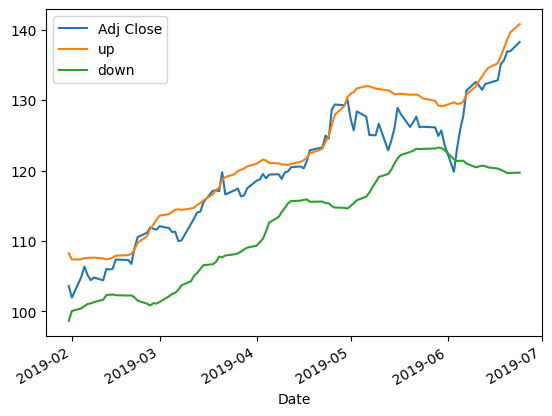

In [69]:
df_test[['Adj Close', 'up', 'down']].plot()

In [50]:
start = '2010-01-01'

In [51]:
start = datetime.strptime(start, '%Y-%m-%d')

In [53]:
price_df = df.loc[start : ]

### 보유 내역 추가
- 조건식
    - 상단 밴드보다 수정 종가가 높거나 같은 경우
        - 현재 보유 상태라면
            - 매도 (trade = '')
        - 현재 보유 상태가 아니면
            - 유지 (trade = '')
    - 상단 밴드보다 낮고 하단 밴드보다 높은 경우
        - 현재 보유 상태라면
            - 유지 (trade = 'buy')
        - 현재 보유 상태가 아니면
            - 유지 (trade = '')
    - 하단 밴드보다 수정 종가가 낮거나 같은 경우
        - 현재 보유 상태라면
            - 유지 (trade = 'buy')
        - 현재 보유 산태가 아니면
            - 매수 (trade = 'buy')


In [54]:
# trade 컬럼을 생성
price_df['trade'] = ''

/var/folders/r7/wm80f9fd57g6h8jt36r8dgwh0000gn/T/ipykernel_79109/2934138610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['trade'] = ''


In [57]:
for idx in price_df.index:
    # idx에는 price_df의 인덱스 값(시계열 데이터)
    # 상단 밴드의 값보다 수정 종가의 값이 크거나 같다면
    if price_df.loc[idx, 'Adj Close'] >= price_df.loc[idx, 'up']:
        # 현재 보유 상태라면? -> 전날에 trade가 'buy'인 경우
        if price_df.shift().loc[idx, 'trade'] == 'buy':
            price_df.loc[idx, 'trade'] = ''
        else:
            # 현재 보유상태가 아니라면 유지
            price_df.loc[idx, 'trade'] = ''
    # 하단밴드보다 낮거나 같은 경우
    elif price_df.loc[idx, 'down'] >= price_df.loc[idx, 'Adj Close']:
        # 현재 보유 상태라면 유지
        if price_df.shift().loc[idx, 'trade'] == 'buy':
            price_df.loc[idx, 'trade'] = 'buy'
        else:
            # 현재 보유상태가 아니라면 매수
            price_df.loc[idx, 'trade'] = 'buy'
    # 밴드 사이에 수정 종가가 존재하고 있을때
    else:
        # 현재 보유상태라면 유지
        if price_df.shift().loc[idx, 'trade'] == 'buy':
            price_df.loc[idx, 'trade'] = 'buy'
        # 보유상태가 아니라면 유지
        else:
            price_df.loc[idx, 'trade'] = ''

In [58]:
price_df['trade'].value_counts()

trade
       1400
buy     984
Name: count, dtype: int64

### 수익률 계산
- 구매한 날의 수정종가
    - 전날의 trade가 ''이고 오늘의 trade가 'buy'인 조건의 Adj Close
- 판매한 날의 수정종가
    - 전날의 trade가 'buy'이고 오늘의 trade가 ''인 조건의 Adj Close
- 수익률
    - 판매한 날의 수정 종가 / 구매한 날의 수정 종가

In [59]:
# 수익률 컬럼을 생성 기본값을 1로 지정
price_df['rtn'] = 1

for idx in price_df.index:
    # 구매한 날짜의 조건식
    if (price_df.shift().loc[idx, 'trade'] == '') & (price_df.loc[idx, 'trade'] == 'buy'):
        buy = price_df.loc[idx, 'Adj Close']
        print(f"매수일 : {idx}, 매수가 : {buy}")
    # 매도한 날짜의 조건식
    elif (price_df.shift().loc[idx, 'trade'] == 'buy') & (price_df.loc[idx, 'trade'] == ''):
        sell = price_df.loc[idx, 'Adj Close']
        print(f"매도일 : {idx}, 매도가 : {sell}")
        # 수익률 계산
        rtn = sell/buy
        price_df.loc[idx, 'rtn'] = rtn
        print(f"수익률 : {rtn}")

/var/folders/r7/wm80f9fd57g6h8jt36r8dgwh0000gn/T/ipykernel_79109/4058949278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['rtn'] = 1
/var/folders/r7/wm80f9fd57g6h8jt36r8dgwh0000gn/T/ipykernel_79109/4058949278.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0279195322598862' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  price_df.loc[idx, 'rtn'] = rtn


매수일 : 2010-01-22 00:00:00, 매수가 : 22.948128
매도일 : 2010-03-17 00:00:00, 매도가 : 23.588829
수익률 : 1.0279195322598862
매수일 : 2010-05-06 00:00:00, 매수가 : 23.07136
매도일 : 2010-09-13 00:00:00, 매도가 : 20.187721
수익률 : 0.875012179602763
매수일 : 2010-11-23 00:00:00, 매수가 : 20.319853
매도일 : 2011-01-06 00:00:00, 매도가 : 23.312819
수익률 : 1.1472926994107686
매수일 : 2011-03-16 00:00:00, 매수가 : 20.171436
매도일 : 2011-04-06 00:00:00, 매도가 : 21.278055
수익률 : 1.0548606950937949
매수일 : 2011-05-16 00:00:00, 매수가 : 19.992422
매도일 : 2011-06-27 00:00:00, 매도가 : 20.639456
수익률 : 1.032363962705469
매수일 : 2011-08-04 00:00:00, 매수가 : 21.245531
매도일 : 2011-08-31 00:00:00, 매도가 : 21.923595
수익률 : 1.0319156061573607
매수일 : 2011-11-01 00:00:00, 매수가 : 21.420837
매도일 : 2012-01-03 00:00:00, 매도가 : 22.229851
수익률 : 1.037767618510892
매수일 : 2012-04-04 00:00:00, 매수가 : 26.087456
매도일 : 2012-06-19 00:00:00, 매도가 : 25.829544
수익률 : 0.9901135626256542
매수일 : 2012-07-12 00:00:00, 매수가 : 24.087934
매도일 : 2012-09-06 00:00:00, 매도가 : 26.551155
수익률 : 1.1022595379080664
매수일 :

In [72]:
price_df['rtn']

Date
2010-01-04    1.0
2010-01-05    1.0
2010-01-06    1.0
2010-01-07    1.0
2010-01-08    1.0
             ... 
2019-06-18    1.0
2019-06-19    1.0
2019-06-20    1.0
2019-06-21    1.0
2019-06-24    1.0
Name: rtn, Length: 2384, dtype: float64

In [74]:
acc_rtn = 1

for idx in price_df.index:
    acc_rtn *= price_df.loc[idx, 'rtn']
acc_rtn

np.float64(2.985057953026086)

In [75]:
# 누적 수익률 계산
price_df['rtn'].cumprod()

Date
2010-01-04    1.000000
2010-01-05    1.000000
2010-01-06    1.000000
2010-01-07    1.000000
2010-01-08    1.000000
                ...   
2019-06-18    2.985058
2019-06-19    2.985058
2019-06-20    2.985058
2019-06-21    2.985058
2019-06-24    2.985058
Name: rtn, Length: 2384, dtype: float64

### 볼린저 밴드의 함수화
1. 첫번째 함수
    - 밴드를 생성하는 함수
        - 매개변수 5개
            - 데이터프레임
            - 기준이 되는 컬럼의 이름 ( 'Adj Close' )
            - 시작 시간 ( '2010-01-01' )
            - 종료 시간 ( 현재 시간 )
            - 볼린저 밴드의 그룹이 되는 데이터의 개수 (20)
        - 데이터프레임을 복사
        - 데이터프레임의 컬럼 중 Date가 존재하는가?
            - 존재한다면 Date 컬럼을 인덱스로 변경
        - index를 시계열 데이터로 변경
        - 결측치와 무한대 값을 제외
        - 기준이 되는 컬럼을 제외하고 모두 삭제
        - 이동 평균선, 상단 밴드, 하단 밴드 컬럼을 생성
        - 시작 시간과 종료 시간을 기준으로 필터링
        - 위에서 작업한 결과를 되돌려준다.

In [ ]:
def create_band(
        _df,
        _col='Adj Close',
        _start='2010-01-01',
        _end=datetime.now(),
        _cnt=20
):
    # 복사본을 생성
    result = _df.copy()
    # 컬럼 중 Date 컬럼이 존재하는가?
    if 'Date' in result.columns:
        # Date를 인덱스로 변환
        result.set_index('Date', inplace=True)
    # index를 시계열 데이터로 변경
    result.index = pd.to_datetime(result.index)
    # 결측치, 무한대를 제외시킨다.
    flag = result.isin( [np.nan, np.inf, -np.inf] ).any(axis=1)
    result = result.loc[~flag, [_col]]

    # 이동평균선, 상단 밴드, 하단 밴드 생성
    result['center'] = result[_col].rolling(_cnt).mean()
    result['up'] = result['center'] + (2 * result[_col].rolling(_cnt).std())
    result['down'] = result['center'] - (2 * result[_col].rolling(_cnt).std())
    # 시작 시간과 종료 시간을 시계열 데이터로 변경
    try: 
        start = datetime.strptime(_start, "%Y-%m-%d")
        if type(_end) == 'str':
            end = datetime.strptime(_end, "%Y-%m-%d")
        else:
            end = _end
    except:
        print("시작 시간과 종료 시간의 포맷은 YYYY-mm-dd 입니다.")
        return ""
    # 시작 시간과 종료 시간을 기준으로 데이터를 필터링
    result = result[start : end]
    return result    

In [82]:
df = pd.read_csv("../../csv/AAPL.csv")

In [83]:
band_df = create_band(df)

- 두번째 함수
    - 트레이드 컬럼을 생성하는 함수
        - 매개변수 1개 (create_band()함수의 결과)
    - 복사본을 생성
    - 데이터프레임에서 첫번째 컬럼의 이름을 변수(col)에 저장
    - trade 컬럼을 생성해서 ''을 대입
    - 보유 내역을 반복문을 이용하여 대입
    - 결과를 되돌려준다


In [101]:
def create_trade(_band):
    result = _band.copy()
    # 텃번째 컬럼의 이름을 변수에 저장
    col = result.columns[0]

    # 보유 내역 컬럼을 생성 '' 대입
    result['trade'] = ''

    # 내역 추가
    for idx in result.index:
        # 상단 밴드보다 기준이 되는 컬럼의 값이 크거나 같은 경우
        if result.loc[idx, col] >= result.loc[idx, 'up']:
            # 매수중인 경우 매도 // 보유중 아니면 유지
            # trade = ''
            result.loc[idx, 'trade'] = ''
        # 하단 밴드보다 기준이 되는 컬럼의 값이 작거나 같은 경우
        elif result.loc[idx, col] <= result.loc[idx, 'down']:
            # 보유중이 아니면 매수 // 보유중이면 유지
            # trade = "buy"
            result.loc[idx, 'trade'] = 'buy'
        # 밴드 중간에 기준이 되는 컬럼의 값이 존재한다면
        else:
            # 보유중이라면 보유 유지
            if result.shift().loc[idx, 'trade'] == 'buy':
                result.loc[idx, 'trade'] = 'buy'
            # 보유중이 아니라면 유지
            else:
                result.loc[idx, 'trade'] =''
    return result

In [102]:
trade_df = create_trade(band_df)

In [103]:
trade_df['trade'].value_counts()

trade
       1439
buy     945
Name: count, dtype: int64

- 세번째 함수 생성
    - 수익률을 계산하는 함수
        - 매개변수 1개 : create_trade()함수의 결과
    - 복사본 생성
    - 컬럼의 첫번째 이름을 변수에 저장(col)
    - 수익률 컬럼(rtn)을 생성하고 1을 대입
    - 매수, 배도인 경우를 찾아서 수익률을 rtn에 대입
    - 수익률 데이터를 기준으로 하여 누적 수익률 컬럼을 생성하여 대입
    - 생성된 데이터프레임과 최종 누적 수익률을 되돌려준다.

In [167]:
def create_rtn(_df):
    # 복사본 생성
    result = _df.copy()
    # 컬럼의 첫번째 이름을 변수에 저장
    col = result.columns[0]
    # 수익률 컬럼을 생성 1 대입
    result['rtn'] = 1

    # 수익률 생성
    for idx in result.index:
        # 매수
        if (result.shift().loc[idx, 'trade'] == '') & (result.loc[idx, 'trade'] == 'buy'):
            buy = result.loc[idx, col]
            print(f"매수일 : {idx}, 매수가 : {buy}")
        # 매도
        elif (result.shift().loc[idx, 'trade'] == 'buy') & (result.loc[idx, 'trade'] == ''):
            sell = result.loc[idx, col]
            print(f"매도일 : {idx}, 매도가 : {sell}")

            rtn = sell / buy
            result.loc[idx, 'rtn'] = rtn
            print(f"수익률 : {rtn}")
    # 누적 수익률 계산
    result['acc_rtn'] = result['rtn'].cumprod()
    # 최종 누적 수익률 변수 저장
    acc_rtn = result.iloc[-1, -1]
    return result, acc_rtn

In [169]:
rtn_df, acc_rtn = create_rtn(trade_df)

매수일 : 2010-01-22 00:00:00, 매수가 : 24.747818
매도일 : 2010-03-01 00:00:00, 매도가 : 26.154476
수익률 : 1.0568396777445188
매수일 : 2010-08-24 00:00:00, 매수가 : 30.026524
매도일 : 2010-09-08 00:00:00, 매도가 : 32.90366
수익률 : 1.0958198158401553
매수일 : 2011-03-16 00:00:00, 매수가 : 41.299767
매도일 : 2011-07-01 00:00:00, 매도가 : 42.957966
수익률 : 1.040150323366231
매수일 : 2011-11-14 00:00:00, 매수가 : 47.463268
매도일 : 2011-12-27 00:00:00, 매도가 : 50.876015
수익률 : 1.0719029081604747
매수일 : 2012-04-16 00:00:00, 매수가 : 72.601524
매도일 : 2012-06-18 00:00:00, 매도가 : 73.308609
수익률 : 1.0097392583659814
매수일 : 2012-10-08 00:00:00, 매수가 : 80.207954
매도일 : 2013-07-29 00:00:00, 매도가 : 57.243137
수익률 : 0.7136840443530077
매수일 : 2013-09-11 00:00:00, 매수가 : 60.184383
매도일 : 2013-10-18 00:00:00, 매도가 : 65.48336
수익률 : 1.0880457144505413
매수일 : 2014-01-03 00:00:00, 매수가 : 70.019096
매도일 : 2014-03-25 00:00:00, 매도가 : 70.960335
수익률 : 1.0134426042861222
매수일 : 2014-10-15 00:00:00, 매수가 : 89.842468
매도일 : 2014-10-23 00:00:00, 매도가 : 96.557182
수익률 : 1.0747387527243797
매수일 

/var/folders/r7/wm80f9fd57g6h8jt36r8dgwh0000gn/T/ipykernel_79109/308262780.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0568396777445188' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.loc[idx, 'rtn'] = rtn


매도일 : 2016-03-01 00:00:00, 매도가 : 95.095795
수익률 : 0.8986088022936081
매수일 : 2016-04-27 00:00:00, 매수가 : 92.532272
매도일 : 2016-05-24 00:00:00, 매도가 : 93.171783
수익률 : 1.0069112212007503
매수일 : 2016-06-20 00:00:00, 매수가 : 90.507019
매도일 : 2016-07-18 00:00:00, 매도가 : 95.008583
수익률 : 1.0497371811571874
매수일 : 2016-09-09 00:00:00, 매수가 : 98.680893
매도일 : 2016-09-14 00:00:00, 매도가 : 106.948166
수익률 : 1.0837778494768993
매수일 : 2016-11-01 00:00:00, 매수가 : 106.680237
매도일 : 2016-12-13 00:00:00, 매도가 : 110.786522
수익률 : 1.0384915249110291
매수일 : 2017-06-09 00:00:00, 매수가 : 144.5
매도일 : 2017-07-13 00:00:00, 매도가 : 143.32637
수익률 : 0.9918779930795848
매수일 : 2017-09-20 00:00:00, 매수가 : 151.971283
매도일 : 2017-10-16 00:00:00, 매도가 : 155.681183
수익률 : 1.0244118489149032
매수일 : 2018-01-29 00:00:00, 매수가 : 164.136932
매도일 : 2018-05-04 00:00:00, 매도가 : 180.378143
수익률 : 1.0989491566712115
매수일 : 2018-06-25 00:00:00, 매수가 : 179.438583
매도일 : 2018-08-01 00:00:00, 매도가 : 198.47876
수익률 : 1.106109715545402
매수일 : 2018-11-02 00:00:00, 매수가 : 205.0858

In [170]:
rtn_df

,Adj Close,center,up,down,trade,rtn,acc_rtn
Date,,,,,,,
2010-01-04,26.782711,25.037723,27.046734,23.028713,,1.0,1.000000
2010-01-05,26.829010,25.169503,27.288098,23.050908,,1.0,1.000000
2010-01-06,26.402260,25.307290,27.366449,23.248130,,1.0,1.000000
2010-01-07,26.353460,25.436879,27.410937,23.462821,,1.0,1.000000
2010-01-08,26.528664,25.525609,27.529742,23.521475,,1.0,1.000000
...,...,...,...,...,...,...,...
2019-06-18,198.449997,185.432500,201.032574,169.832427,buy,1.0,1.392329
2019-06-19,197.869995,185.996000,202.558154,169.433846,buy,1.0,1.392329
2019-06-20,199.460007,186.830000,204.361771,169.298229,buy,1.0,1.392329


In [171]:
acc_rtn

np.float64(1.3923287814461949)